In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df = pd.read_csv('heart.csv')


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
age,52.0,53.0,70.0,61.0,62.0,58.0,58.0,55.0,46.0,54.0,...,58.0,65.0,53.0,41.0,47.0,59.0,60.0,47.0,50.0,54.0
sex,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
cp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
trestbps,125.0,140.0,145.0,148.0,138.0,100.0,114.0,160.0,120.0,122.0,...,128.0,138.0,123.0,110.0,112.0,140.0,125.0,110.0,110.0,120.0
chol,212.0,203.0,174.0,203.0,294.0,248.0,318.0,289.0,249.0,286.0,...,216.0,282.0,282.0,172.0,204.0,221.0,258.0,275.0,254.0,188.0
fbs,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
restecg,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
thalach,168.0,155.0,125.0,161.0,106.0,122.0,140.0,145.0,144.0,116.0,...,131.0,174.0,95.0,158.0,143.0,164.0,141.0,118.0,159.0,113.0
exang,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
oldpeak,1.0,3.1,2.6,0.0,1.9,1.0,4.4,0.8,0.8,3.2,...,2.2,1.4,2.0,0.0,0.1,0.0,2.8,1.0,0.0,1.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.duplicated().sum()                                                                                                 

723

In [ ]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

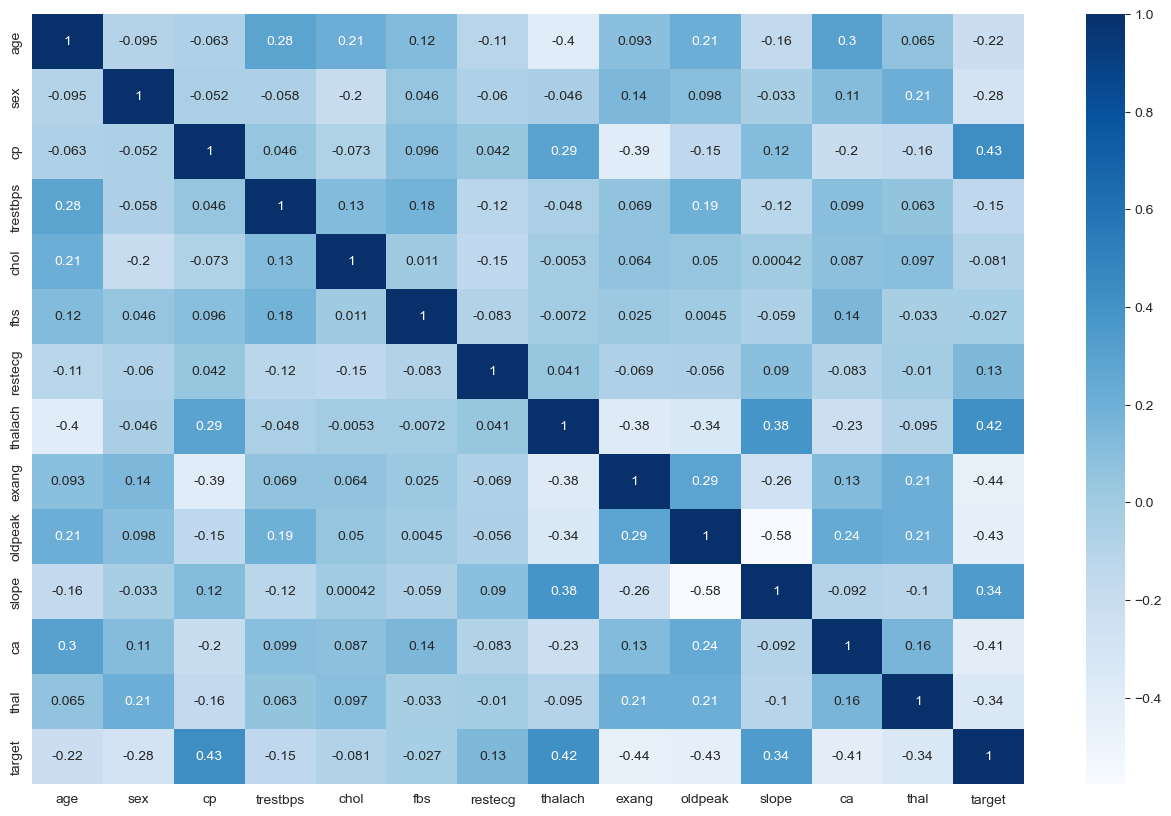

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(hd.corr(), annot= True, cmap = 'Blues')

In [ ]:
hd.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
for c in hd.columns:
  print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [ ]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

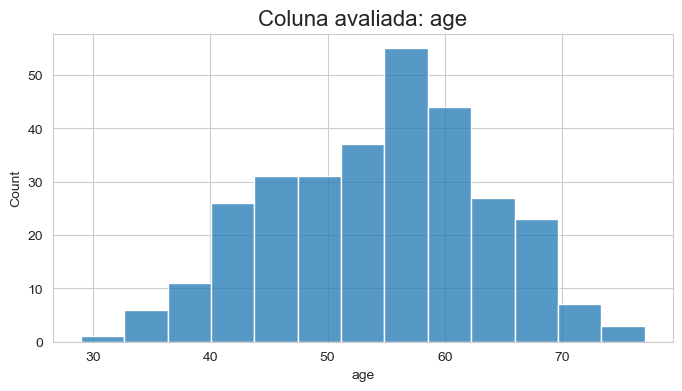

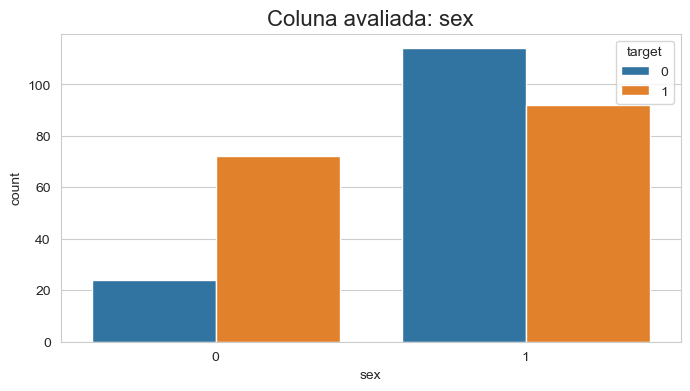

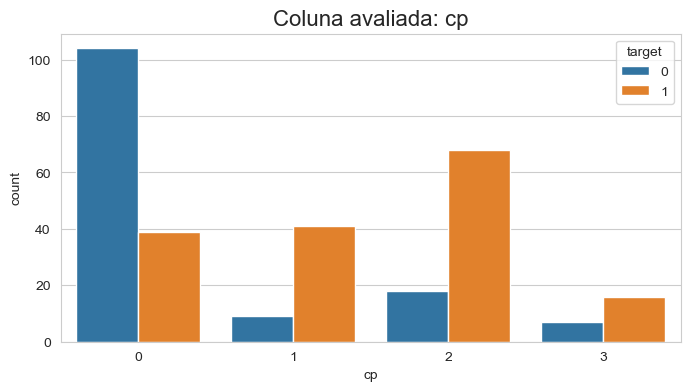

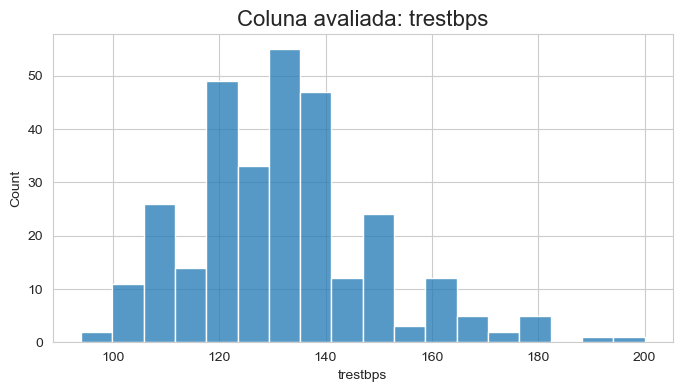

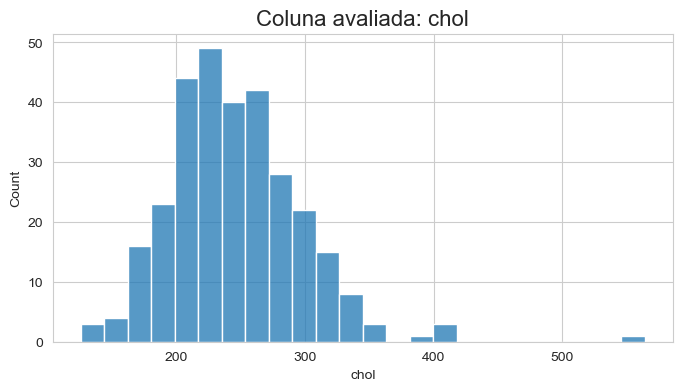

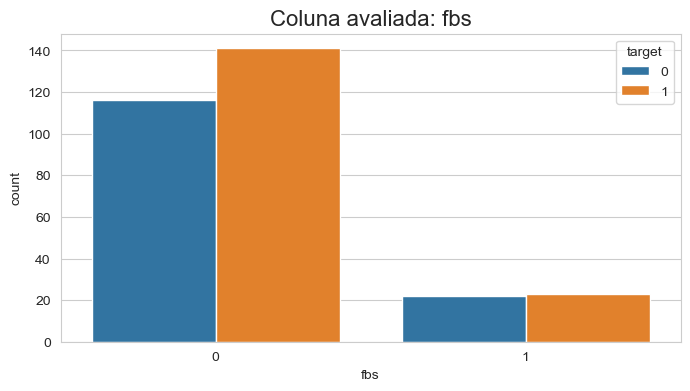

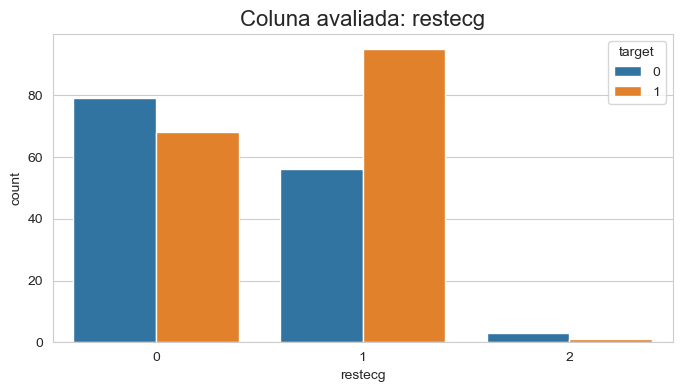

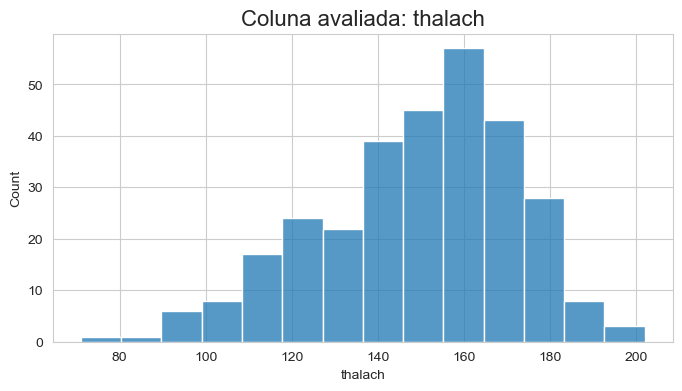

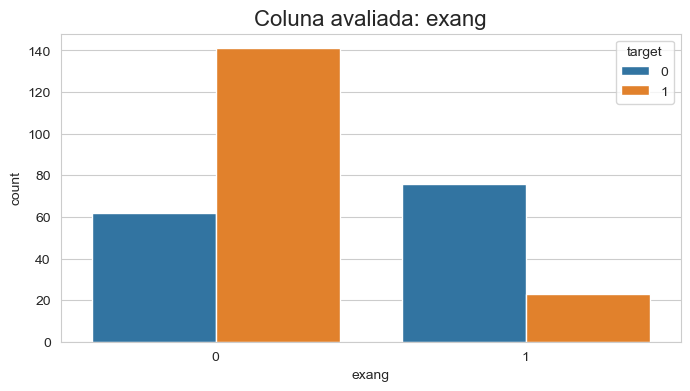

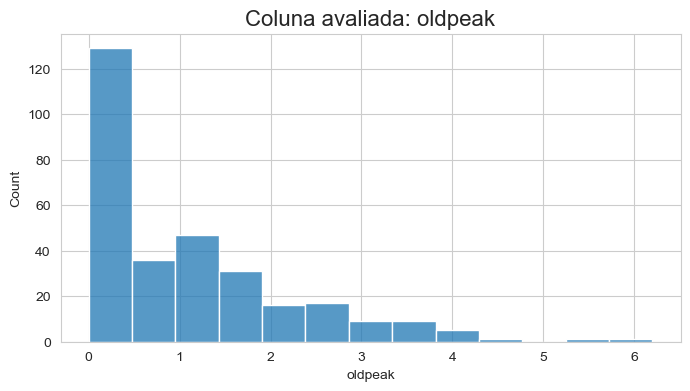

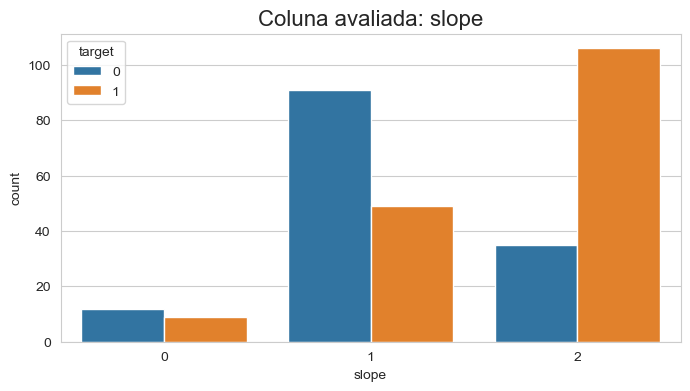

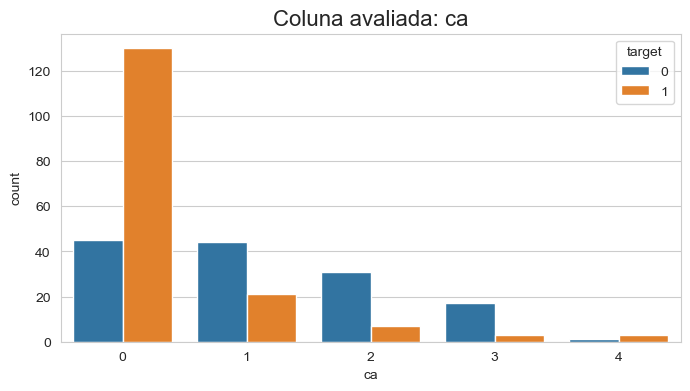

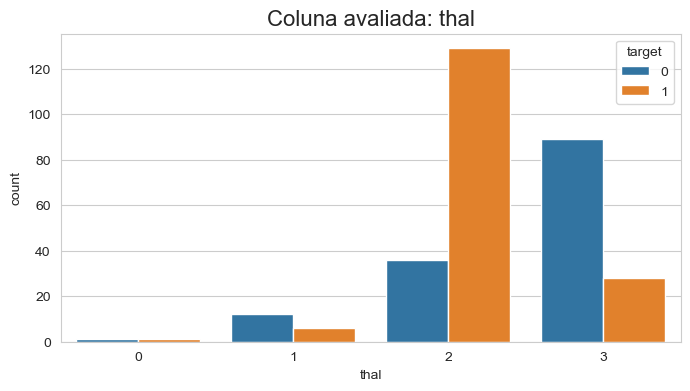

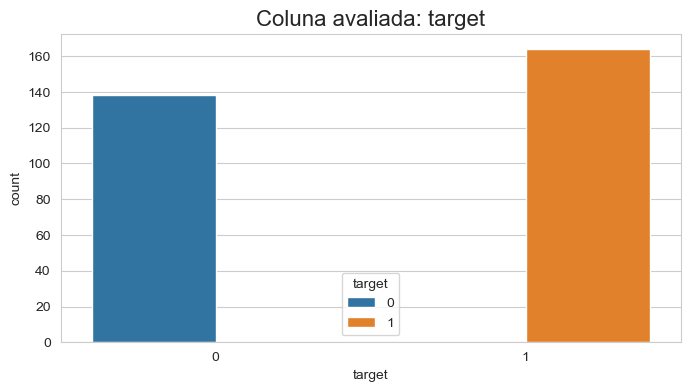

In [ ]:
for c in hd.columns:
  plt.figure(figsize=(8,4))
  plt.title(f"Coluna avaliada: {c}", fontsize=16)
  if c in categoricas:
    sns.countplot(x=hd[c], hue = hd['target'])
  if c in numericas:
    sns.histplot(hd[c])

<Axes: >

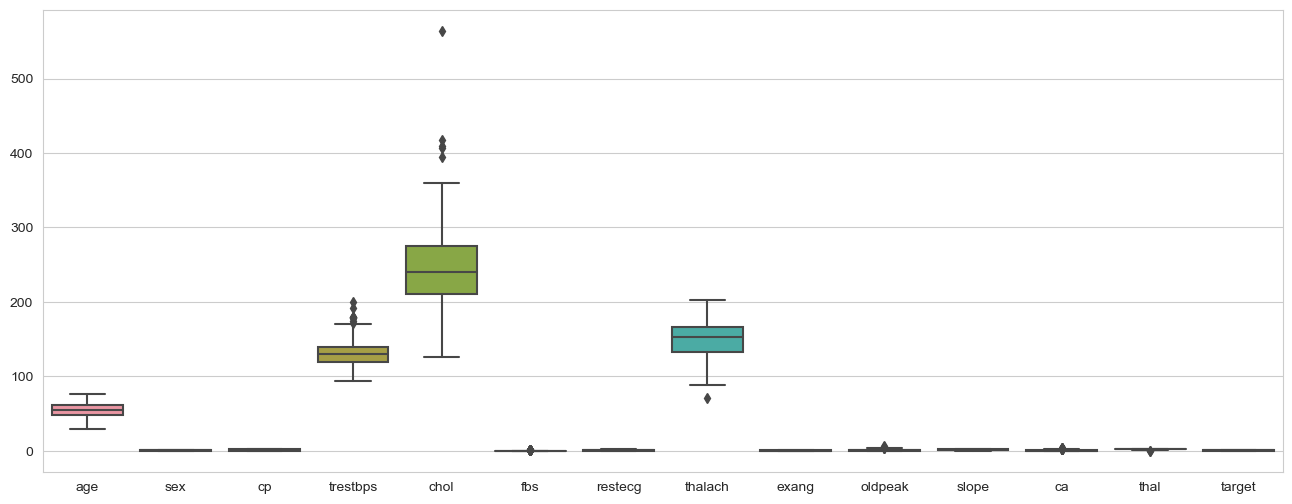

In [ ]:
plt.figure(figsize = (16, 6))
sns.boxplot(data=hd)

In [ ]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
hd['trestbps'].quantile(0.99)

180.0

In [ ]:
hd1 = hd[hd["trestbps"] < hd['trestbps'].quantile(0.99)]
hd1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: >

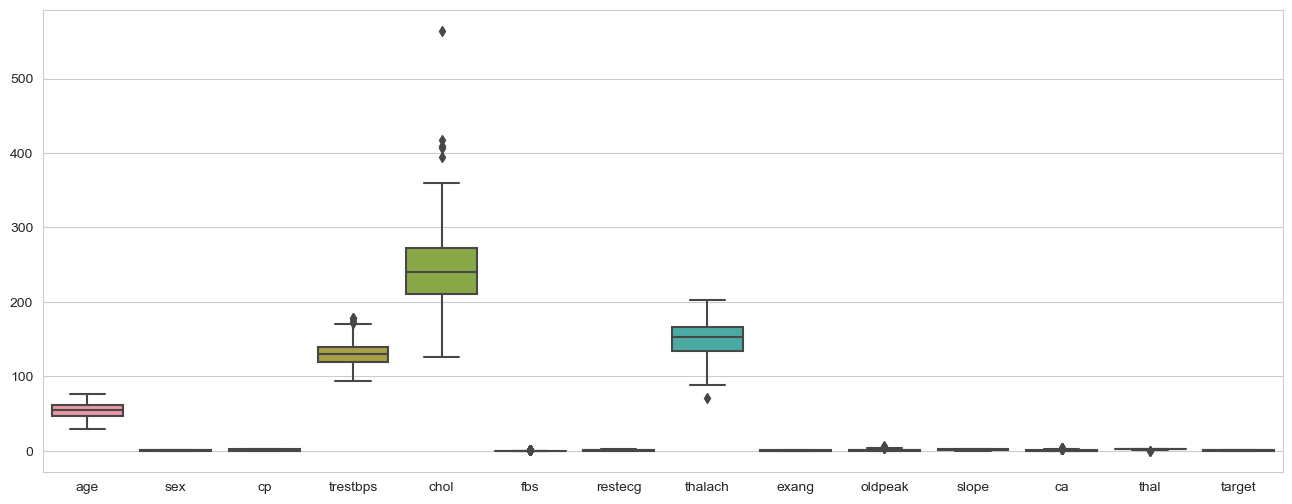

In [ ]:
plt.figure(figsize = (16, 6))
sns.boxplot(data=hd1)

In [ ]:
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
hd1['chol'].quantile(0.98)

354.4799999999999

In [ ]:
hd2 = hd1[hd1["chol"] < hd1['chol'].quantile(0.98)]

<Axes: >

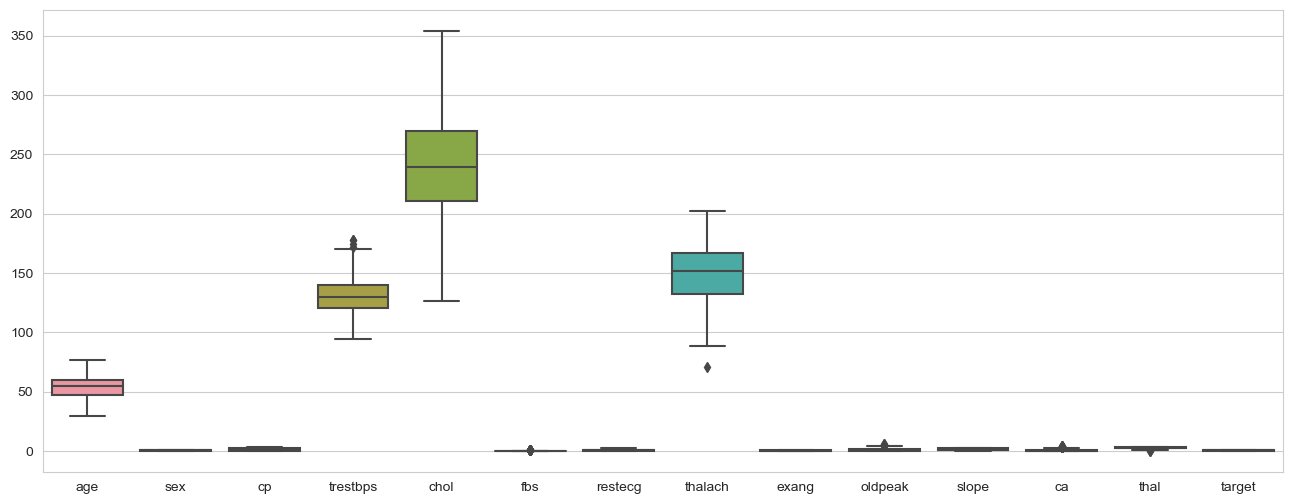

In [ ]:
plt.figure(figsize = (16, 6))
sns.boxplot(data=hd2)

In [ ]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.158076,0.701031,0.969072,130.491409,241.907216,0.144330,0.536082,149.457045,0.323024,1.016151,1.402062,0.714777,2.305842,0.546392
std,9.064278,0.458595,1.035111,16.142761,44.214699,0.352029,0.519851,23.061553,0.468437,1.143368,0.615766,1.005719,0.615266,0.498701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
hd2['thalach'].quantile(0.005)

88.9

In [ ]:
hd3 = hd2[hd2["thalach"] > hd2['thalach'].quantile(0.005)]

<Axes: >

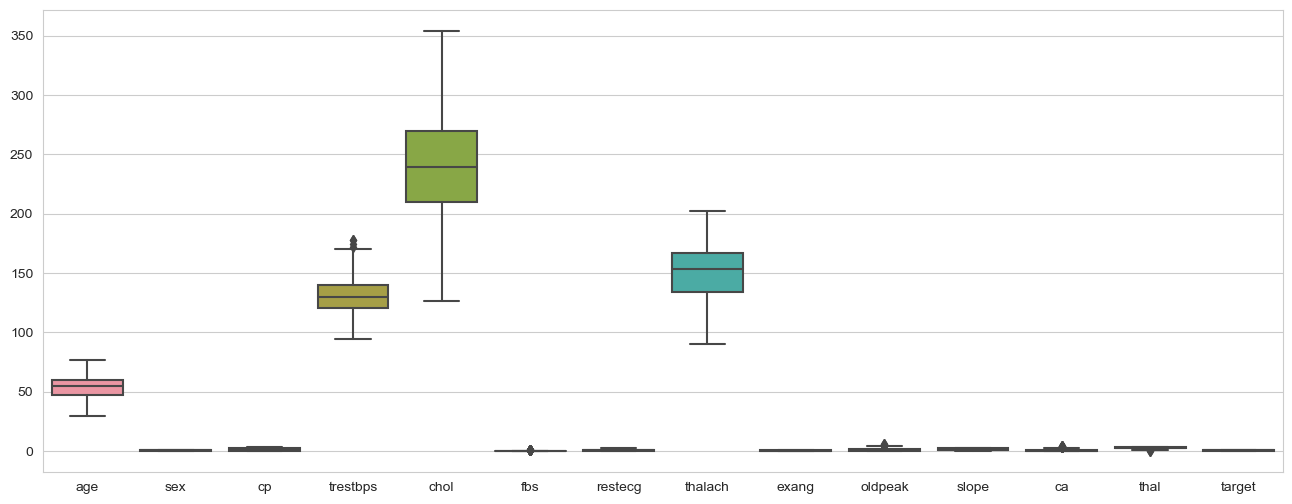

In [ ]:
plt.figure(figsize = (16, 6))
sns.boxplot(data=hd3)

In [ ]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
hd3.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
hd4 = pd.get_dummies(hd3, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)
hd4

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,59,160,273,125,0.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X = hd4.drop('target', axis = 1)
y = hd4['target']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
109,54,110,206,108,0.0,1,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
74,48,130,256,150,0.0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
71,61,140,207,138,1.9,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
94,62,128,208,140,0.0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
26,44,130,233,179,0.4,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,64,140,313,133,0.2,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
80,50,140,233,163,0.6,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
129,57,140,192,148,0.4,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
599,63,140,195,179,0.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
50,58,150,283,162,1.0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
220,57,130,236,174,0.0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
628,69,140,239,151,1.8,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
47,66,178,228,165,1.0,0,0,0,0,1,...,1,1,0,0,1,0,0,0,0,1
271,44,120,263,173,0.0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,54,122,286,116,3.2,1,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
51,57,140,241,123,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
252,55,132,353,132,1.2,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
90,54,108,267,167,0.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
300,46,105,204,172,0.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
log = LogisticRegression(max_iter=1000)

In [ ]:
log.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
log.score(X_train,y_train)

0.8701298701298701

In [ ]:
log.score(X_test,y_test)

0.8275862068965517

In [ ]:
y_previsto = log.predict(X_test)
y_previsto

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [ ]:
accuracy_score(y_test, y_previsto)

0.8275862068965517

In [ ]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58



In [ ]:
confusion_matrix(y_test, y_previsto)

array([[17,  7],
       [ 3, 31]], dtype=int64)

In [ ]:
def relatorio_ml(df,algoritmo, opt = 2):
  X = df.drop('target', axis= 1)
  y = df['target']
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
  if opt == 0:
    ml = algoritmo(max_iter = 1000)
  elif opt == 1:
    ml = algoritmo(n_estimators = 1000)
  elif opt == 2:
    ml = algoritmo()
    
  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f"Acurácia treino: {score_train * 100:.2f}%")
  score_test = ml.score(X_test, y_test)
  print(f"Acurácia test: {score_test * 100:.2f}%")
  
  
  y_previsto = log.predict(X_test)
  print("----- CLASSIFICATION REPORT -------")
  print(classification_report(y_test, y_previsto))
  print("-------- CONFUSION MATRIX --------")
  confusao = confusion_matrix(y_test, y_previsto)
  sns.heatmap(confusao, annot= True, cmap= 'Blues')
  
  return score_train, score_test
  

Acurácia treino: 87.01%
Acurácia test: 82.76%
----- CLASSIFICATION REPORT -------
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58

-------- CONFUSION MATRIX --------


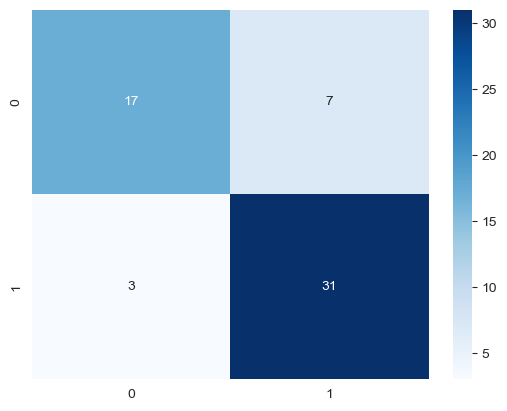

In [ ]:
log_train, log_test = relatorio_ml(hd4, LogisticRegression, opt = 0)

Acurácia treino: 100.00%
Acurácia test: 74.14%
----- CLASSIFICATION REPORT -------
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58

-------- CONFUSION MATRIX --------


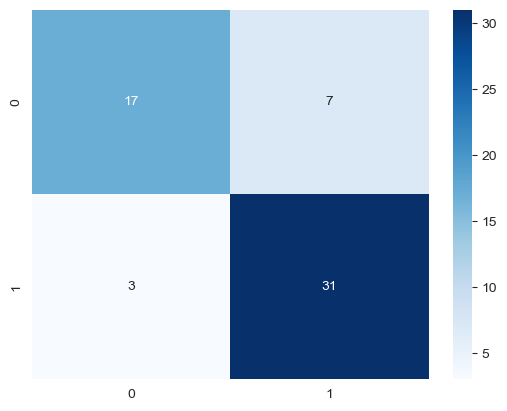

In [ ]:
tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier)

Acurácia treino: 92.21%
Acurácia test: 81.03%
----- CLASSIFICATION REPORT -------
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58

-------- CONFUSION MATRIX --------


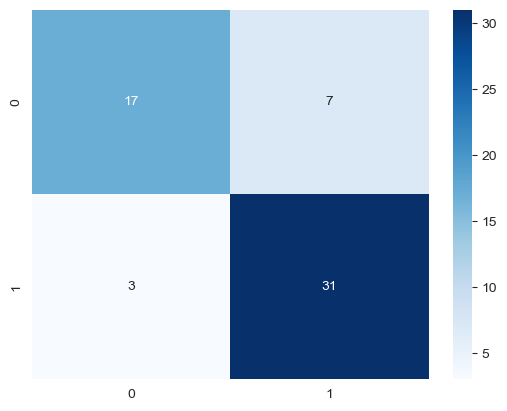

In [ ]:
ada_train, ada_test = relatorio_ml(hd4, AdaBoostClassifier)

Acurácia treino: 100.00%
Acurácia test: 75.86%
----- CLASSIFICATION REPORT -------
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58

-------- CONFUSION MATRIX --------


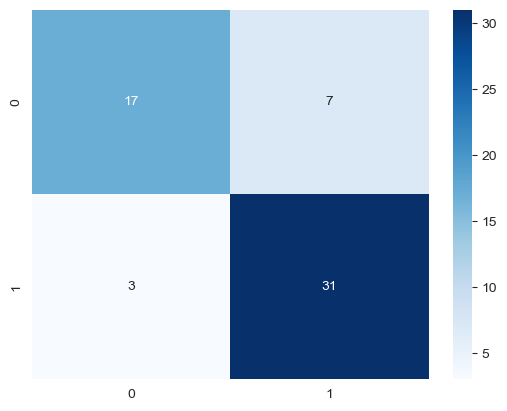

In [ ]:
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier)

In [ ]:
data = {
    'Modelo': ['Regressão Logística', 'Árvore de Decisão', 'AdaBoost', 'Random Forest'],
    'Acuracia Treino': [log_train, tree_train, ada_train, rand_train],
    'Acuracia Teste': [log_test, tree_test, ada_test, rand_test]
}

df = pd.DataFrame(data)
df.sort_values(by='Acuracia Teste', ascending=False, inplace=True)
df

,Modelo,Acuracia Treino,Acuracia Teste
0,Regressão Logística,0.870130,0.827586
2,AdaBoost,0.922078,0.810345
3,Random Forest,1.000000,0.758621
1,Árvore de Decisão,1.000000,0.741379
